<a href="#Import"> 1. Import Dependencies </a><br>
<a href="#Validate"> 2. Validate Data </a><br>
<a href="#Prune"> 3. Prune Data</a><br>
<a href="#ML"> 4. Machine Learning </a>

<hr>

## 1. Import Dependencies <a id='Import'></a>

In [81]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

from mongoHandler import mongoHandler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
import shap


In [82]:
#mongoHandler = mongoHandler()
#mongoHandler.pullMongoDB("pastdata.csv")

## 2. Validate Data <a id=Validate></a>

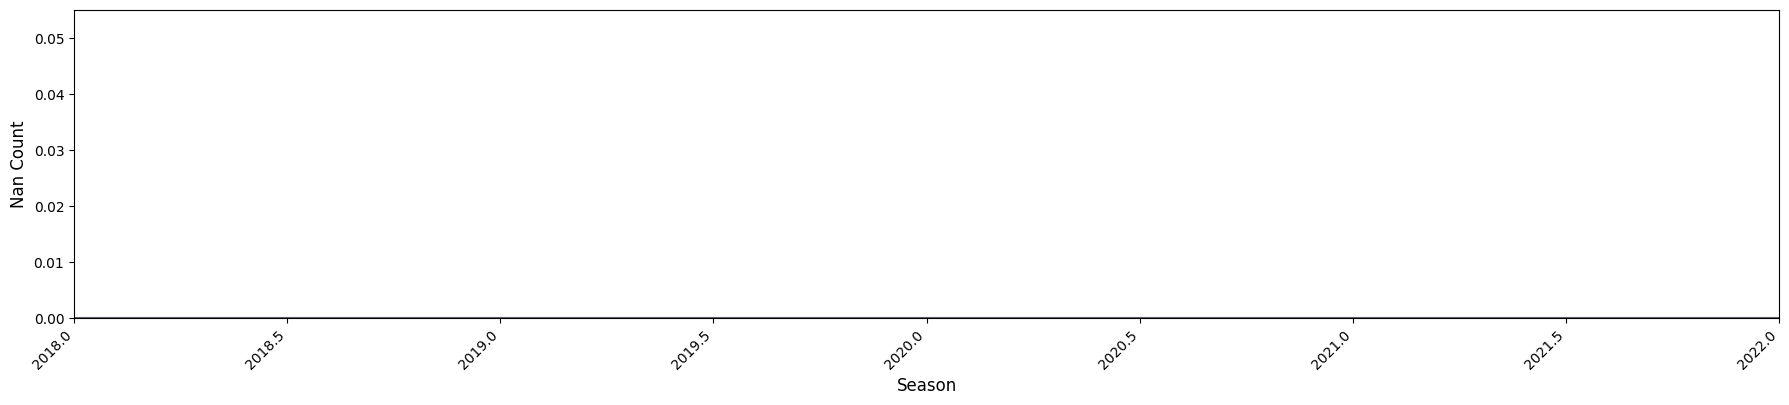

In [83]:
# This is optional as our data does not have any null values, but may be useful for other data sets
df = pd.read_csv("pastdata.csv")
prediction = pd.read_csv('2023data.csv')
df_detail_nan = []

for season in df['season'].unique():
    df_nan = df[df['season'] == season]
    series_nan = df_nan.isnull().sum()
    df_nan = series_nan.to_frame(name="Nan_Count")
    df_nan = df_nan.rename_axis('Col_Name').reset_index()
    df_nan['season'] = season
    df_detail_nan.append(df_nan)

df_detail_nan = pd.concat(df_detail_nan, ignore_index=True)

df_per_season_nan = df_detail_nan[['season','Nan_Count']].groupby("season").sum().reset_index()
df_per_season_nan = df_per_season_nan.sort_values(by=['season'], ascending=True)

fig = plt.figure(figsize = (22, 4))
sns.lineplot(data=df_per_season_nan, x="season", y="Nan_Count", sort=True)
plt.ylim(0)
plt.ylabel('Nan Count', fontsize=12)
plt.xticks(rotation=45,horizontalalignment='right',fontweight='light', fontsize=10)
plt.xlabel('Season', fontsize=12)
plt.margins(x=0)
plt.show()

## 3. Prune Data <a id="Prune">

In [84]:
# These stats are either duplicates or not useful for our analysis
STATS_TO_DROP = [
    'players_used', 'games', 'games_starts', 'minutes', 'minutes_90s', 'goals', 'assists',
    'goals_assists', 'goals_pens', 'pens_made', 'pens_att', 'cards_yellow', 
    'cards_red','xg', 'npxg','xg_assist', 'npxg_xg_assist', 'gk_games', 
    'gk_games_starts', 'gk_minutes','gk_goals_against', 'gk_saves', 'gk_wins', 
    'gk_ties', 'gk_losses','gk_clean_sheets', 'gk_pens_att', 'gk_pens_allowed', 
    'gk_pens_saved', 'gk_pens_missed', 'gk_psxg_net', 'gk_passes_completed_launched',
    'gk_passes_launched', 'gk_crosses_stopped', 'gk_def_actions_outside_pen_area',
    'shots', 'shots_on_target', 'sca', 'gca'
]

# These stats are too representative of the amount of games played, leading to skewed results.
# Thus we convert them to per 90 stats.
STATS_TO_PER90 = [
    'progressive_carries', 'progressive_passes','gk_free_kick_goals_against', 
    'gk_corner_kick_goals_against', 'gk_own_goals_against','gk_psxg', 'gk_passes', 
    'gk_passes_throws', 'gk_goal_kicks', 'gk_crosses','xg_net', 'npxg_net', 'passes_completed', 
    'passes', 'passes_completed_short', 'passes_short', 'passes_completed_medium', 'passes_medium', 
    'passes_completed_long','passes_long', 'pass_xa', 'xg_assist_net', 'assisted_shots', 
    'passes_into_final_third','passes_into_penalty_area', 'crosses_into_penalty_area', 
    'passes_live', 'passes_dead','passes_free_kicks', 'through_balls', 'passes_switches', 
    'crosses', 'throw_ins','corner_kicks', 'corner_kicks_in', 'corner_kicks_out', 'corner_kicks_straight',
    'passes_offsides', 'passes_blocked', 'sca_passes_live', 'sca_passes_dead',
    'sca_take_ons', 'sca_shots', 'sca_fouled', 'sca_defense', 'gca_passes_live',
    'gca_passes_dead', 'gca_take_ons', 'gca_shots', 'gca_fouled', 'gca_defense',
    'tackles', 'tackles_won', 'tackles_def_3rd', 'tackles_mid_3rd', 'tackles_att_3rd',
    'challenge_tackles', 'challenges', 'challenges_lost', 'blocks', 'blocked_shots',
    'blocked_passes', 'interceptions', 'tackles_interceptions', 'clearances', 'errors',
    'touches', 'touches_def_pen_area', 'touches_def_3rd', 'touches_mid_3rd', 'touches_att_3rd',
    'touches_att_pen_area', 'touches_live_ball', 'take_ons', 'take_ons_won',
    'take_ons_tackled', 'carries', 'carries_distance', 'carries_progressive_distance',
    'carries_into_final_third', 'carries_into_penalty_area', 'miscontrols', 'dispossessed',
    'passes_received', 'progressive_passes_received', 'cards_yellow_red', 'fouls', 'fouled',
    'offsides', 'pens_won', 'pens_conceded', 'own_goals', 'ball_recoveries', 'aerials_won',
    'aerials_lost'
]


In [85]:
df[STATS_TO_PER90] = df[STATS_TO_PER90].div(df['minutes_90s'], axis=0)
df.drop(columns=STATS_TO_DROP, inplace=True)
df

,team,avg_age,possession,progressive_carries,progressive_passes,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,...,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,position,topGoals,season
0,Ajax,26.0,61.4,22.375000,63.625000,2.62,2.00,4.62,2.50,4.50,...,0.125,0.250000,0.125000,55.625000,12.625000,11.000,53.4,9,11,2022
1,Atalanta,28.2,52.0,22.166667,43.666667,2.00,1.83,3.83,2.00,3.83,...,0.000,0.000000,0.000000,61.833333,14.500000,10.500,58.0,17,3,2022
2,Atlético Madrid,27.9,40.6,16.100000,28.400000,0.90,0.80,1.70,0.80,1.60,...,0.000,0.200000,0.000000,50.400000,12.100000,14.500,45.5,5,4,2022
3,Barcelona,25.9,57.8,23.666667,51.500000,0.33,0.17,0.50,0.33,0.50,...,0.000,0.166667,0.000000,52.500000,13.166667,9.000,59.4,17,1,2022
4,Bayern Munich,26.9,62.9,23.800000,70.500000,3.00,2.30,5.30,2.70,5.00,...,0.200,0.000000,0.000000,58.800000,10.900000,9.200,54.2,5,13,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Sevilla,27.2,57.8,22.500000,60.100000,1.50,1.10,2.60,1.30,2.40,...,0.200,0.100000,0.100000,58.400000,14.200000,15.900,47.2,5,8,2018
156,Shakhtar,27.6,47.5,24.750000,29.125000,1.37,0.87,2.25,1.37,2.25,...,0.000,0.375000,0.000000,46.375000,7.750000,8.500,47.7,9,3,2018
157,Spartak Moscow,27.9,46.2,16.000000,44.000000,1.50,1.17,2.67,1.50,2.67,...,0.000,0.166667,0.000000,54.000000,13.000000,10.000,56.5,17,2,2018
158,Sporting CP,26.6,41.3,17.166667,31.666667,1.17,1.17,2.33,1.17,2.33,...,0.000,0.000000,0.333333,53.000000,14.166667,12.500,53.1,17,2,2018


## 4. Machine Learning <a id="ML"></a>

In [86]:
target = df['position']
features = df.drop(['position','team'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
#model = RandomForestClassifier()
model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Test Prediction: {', '.join(map(str, y_pred))}")

Test Prediction: 15.72, 6.07, 6.16, 3.72, 7.92, 16.92, 14.36, 16.6, 8.84, 2.44, 8.06, 7.8, 16.68, 6.84, 11.74, 16.44, 16.92, 16.76, 8.6, 2.87, 17.0, 16.92, 8.68, 16.6, 16.92, 14.92, 5.72, 5.82, 3.46, 6.21, 16.52, 16.88


In [87]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
print(f"MAE: {MAE.round(4)}")
print(f"MSE: {MSE.round(4)}")

MAE: 0.9822
MSE: 2.1961


In [88]:
prediction = prediction.drop(['team'],axis=1)
y_pred2 = model.predict(prediction)
print(f"2023 Prediction : {', '.join(map(str, y_pred2))}")

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- assists
- cards_red
- cards_yellow
- games
- games_starts
- ...


In [ ]:
prediction

,avg_age,possession,progressive_carries,progressive_passes,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg_per90,...,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,topGoals,season
0,27.2,53.2,80,234,1.83,1.50,3.33,1.67,3.17,1.39,...,18,1,2,0,293,55,84,39.6,4,2023
1,29.5,56.5,111,286,0.67,0.50,1.17,0.67,1.17,1.59,...,20,1,1,0,309,75,81,48.1,1,2023
2,27.2,64.8,167,358,2.00,1.67,3.67,2.00,3.67,1.65,...,8,0,1,0,314,69,70,49.6,5,2023
3,27.4,56.1,249,541,2.10,1.90,4.00,2.00,3.90,1.94,...,26,0,1,0,574,105,113,48.2,4,2023
4,26.8,52.9,187,455,2.50,1.60,4.10,2.00,3.60,1.92,...,16,4,3,0,537,115,143,44.6,6,2023
5,26.8,44.2,98,300,0.50,0.17,0.67,0.50,0.67,1.53,...,4,1,2,0,291,42,43,49.4,2,2023
6,27.7,57.3,211,512,1.20,0.70,1.90,1.00,1.70,1.62,...,27,1,0,0,597,116,109,51.6,3,2023
7,27.1,45.6,109,239,1.00,0.87,1.87,0.87,1.75,1.00,...,14,2,3,0,389,114,96,54.3,2,2023
8,27.7,46.8,107,194,0.67,0.33,1.00,0.67,1.00,0.70,...,2,0,3,1,306,87,72,54.7,2,2023
9,26.8,47.9,159,300,1.37,1.25,2.62,1.37,2.62,1.31,...,8,0,2,0,427,68,86,44.2,4,2023


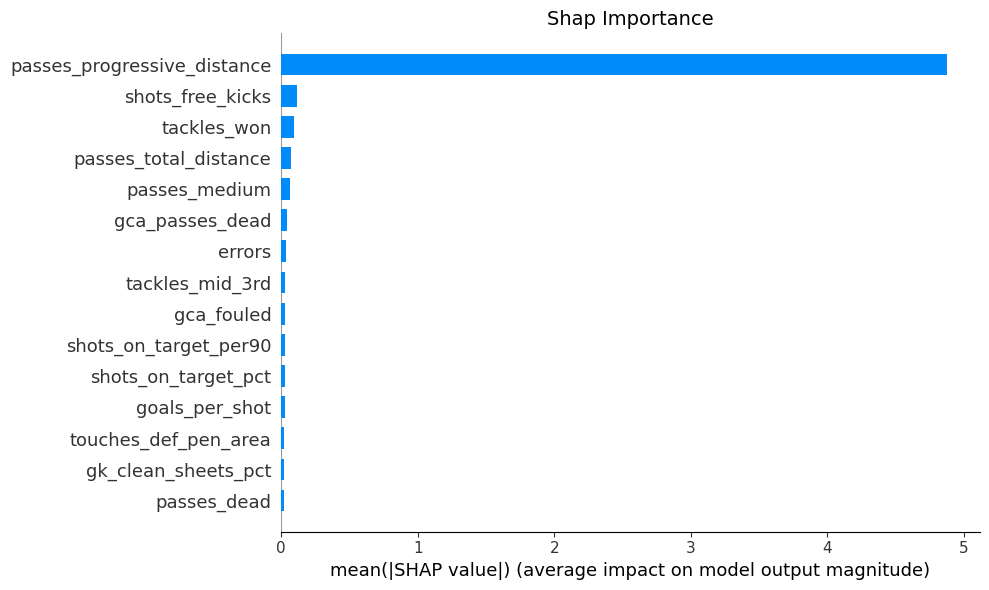

In [89]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=features.columns.to_list(), 
                    show=False, max_display=30)

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title("Shap Importance", fontsize=14, loc="center")   
plt.tight_layout()
plt.show()